# **Decision Tree Specialty Coffee Case Study**




In [1]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  
import pydotplus

In [2]:
df = pd.read_csv('data/RRDinerCoffeeData.csv')

In [3]:
df.head()

,Age,Gender,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
0,36,Female,0,24,73,42789,0.003168,0,1.0
1,24,Male,0,44,164,74035,0.520906,0,NaN
2,24,Male,0,39,119,30563,0.916005,1,1.0
3,20,Male,0,30,107,13166,0.932098,1,NaN
4,24,Female,0,20,36,14244,0.965881,0,1.0


In [4]:
df.shape

(702, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      702 non-null    int64  
 1   Gender                   702 non-null    object 
 2   num_coffeeBags_per_year  702 non-null    int64  
 3   spent_week               702 non-null    int64  
 4   spent_month              702 non-null    int64  
 5   SlrAY                    702 non-null    int64  
 6   Distance                 702 non-null    float64
 7   Online                   702 non-null    int64  
 8   Decision                 474 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 49.5+ KB


In [6]:
df.describe()

,Age,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,474.000000
mean,34.243590,2.710826,32.853276,107.923077,43819.843305,4.559186,0.531339,0.639241
std,13.927945,1.593629,15.731878,55.348485,26192.626943,3.116275,0.499373,0.480728
min,16.000000,0.000000,0.000000,0.000000,1617.000000,0.003168,0.000000,0.000000
25%,23.000000,1.000000,24.250000,62.000000,22812.250000,1.877812,0.000000,0.000000
50%,28.000000,3.000000,36.000000,113.500000,41975.000000,4.196167,1.000000,1.000000
75%,46.000000,4.000000,43.000000,150.750000,60223.000000,6.712022,1.000000,1.000000
max,90.000000,5.000000,62.000000,210.000000,182058.000000,10.986203,1.000000,1.000000


In [7]:
# Col names
df.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_week', 'spent_month',
       'SlrAY', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [8]:
# Make the relevant name changes to spent_week and spent_per_week.
df = df.rename(
    columns = {old_name : new_name for old_name, new_name in 
               zip(['spent_week', 'spent_month', 'SlrAY'], ['spent_last_week', 'spent_last_month', 'salary'])}
)

In [9]:
df.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [10]:
# Gender column's unique values 
df.Gender.unique()

array(['Female', 'Male', 'female', 'F', 'f ', 'FEMALE', 'MALE', 'male',
       'M'], dtype=object)

In [11]:
# Replace all alternate values for the Female entry with 'Female'
df['Gender'] = df['Gender'].replace(['female','F','f','f ','FEMALE'], 'Female')

In [12]:
# Replace all alternate values with "Male"
df['Gender'] = df['Gender'].replace(['MALE','male','M'], 'Male')

In [13]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [14]:
# Unique values of the column 'Decision'
df.Decision.unique()

array([ 1., nan,  0.])

In [15]:
# Replace 1.0 and 0.0 by 'Yes' and 'No'
df.loc[df['Decision'] == 1.0,'Decision'] = 'YES'
df.loc[df['Decision'] == 0.0, 'Decision'] = 'NO'

C:\Users\alexb\AppData\Local\Temp\ipykernel_54228\706030284.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'YES' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Decision'] == 1.0,'Decision'] = 'YES'


In [16]:
df.Decision.unique()

array(['YES', nan, 'NO'], dtype=object)

In [17]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['Count', '%']
missing.sort_values(by= 'Count', ascending= False)

,Count,%
Decision,228,32.478632
Age,0,0.000000
Gender,0,0.000000
num_coffeeBags_per_year,0,0.000000
spent_last_week,0,0.000000
spent_last_month,0,0.000000
salary,0,0.000000
Distance,0,0.000000
Online,0,0.000000


In [18]:
df_dropna = df.dropna()
df_dropna['Decision'].describe()

count     474
unique      2
top       YES
freq      303
Name: Decision, dtype: object

<class 'pandas.core.frame.DataFrame'>
Index: 474 entries, 0 to 701
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      474 non-null    int64  
 1   Gender                   474 non-null    object 
 2   num_coffeeBags_per_year  474 non-null    int64  
 3   spent_last_week          474 non-null    int64  
 4   spent_last_month         474 non-null    int64  
 5   salary                   474 non-null    int64  
 6   Distance                 474 non-null    float64
 7   Online                   474 non-null    int64  
 8   Decision                 474 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 37.0+ KB


<Axes: xlabel='Decision', ylabel='spent_last_week'>

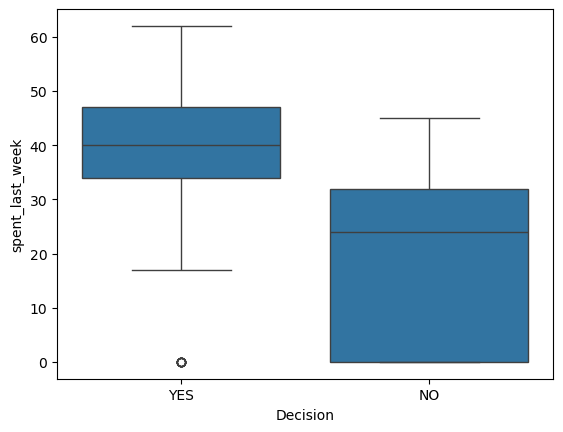

In [19]:
# Boxplot decision over spent last week
df_dropna.info()
sns.boxplot(
    x = 'Decision', 
    y = 'spent_last_week', 
    data = df_dropna)

Can you admissibly conclude anything from this boxplot? Write your answer here:



<Axes: xlabel='Distance', ylabel='spent_last_month'>

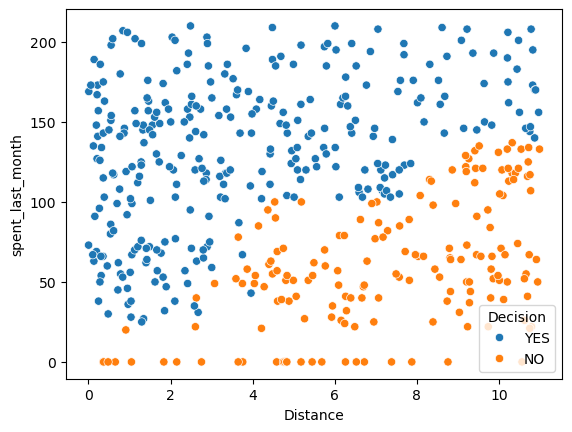

In [20]:
# Scatterplot between distance and spent_last_month; hue is Decision 
sns.scatterplot(
    x = 'Distance', 
    y = 'spent_last_month', 
    data = df_dropna, 
    hue = 'Decision')

In [21]:
# Null values in decision column
df_na = df[df['Decision'].isnull()]

In [22]:
df_na.describe()

,Age,num_coffeeBags_per_year,spent_last_week,spent_last_month,salary,Distance,Online
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,31.802632,2.960526,33.394737,110.407895,41923.741228,3.428836,0.570175
std,14.302293,1.585514,15.697930,53.786536,27406.768360,2.153102,0.496140
min,16.000000,0.000000,0.000000,0.000000,1617.000000,0.010048,0.000000
25%,22.000000,2.000000,25.750000,65.000000,15911.500000,1.699408,0.000000
50%,25.000000,3.000000,37.000000,113.500000,40987.500000,3.208673,1.000000
75%,39.000000,4.000000,44.000000,151.250000,58537.000000,5.261184,1.000000
max,67.000000,5.000000,62.000000,210.000000,182058.000000,10.871566,1.000000


In [23]:
df_dropna.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [24]:
# Predictor variable
features = [column for column in df_dropna.columns if column != 'Decision']
X = df_dropna[features]

# Target Variable
y = df_dropna.Decision

In [25]:
# One-hot encode all features in X.
X = pd.get_dummies(X)


In [26]:
# Test_size = 0.25, random_state = 246
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 246)

In [33]:
# Entropy model - no max_depth
entr_model = tree.DecisionTreeClassifier(criterion = 'entropy', random_state= 1234 )
entr_model.fit(X_train, y_train)
y_pred = entr_model.predict(X_test)
y_pred = pd.Series(y_pred)
entr_model

DecisionTreeClassifier(criterion='entropy', random_state=1234)

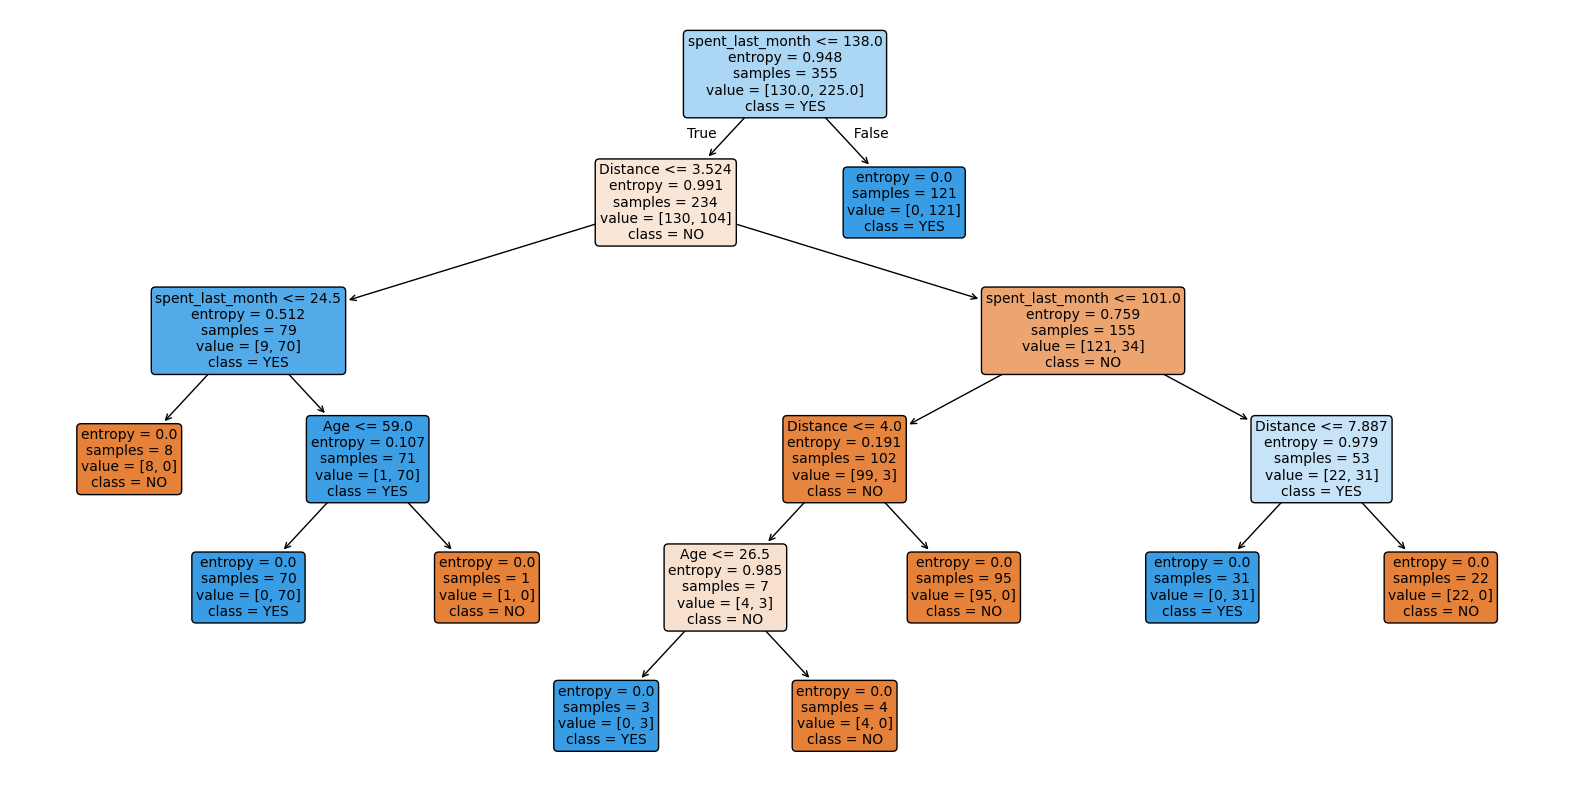

In [34]:
# Visualize the tree
plt.figure(figsize=(20, 10))
tree.plot_tree(entr_model, 
               filled=True, 
               rounded=True, 
               class_names=entr_model.classes_,
               feature_names=entr_model.feature_names_in_ if hasattr(entr_model, 'feature_names_in_') else None,
               fontsize=10)

plt.show()

In [35]:
# Model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, pos_label = "NO"))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, pos_label = "YES"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Entropy - no max depth
Accuracy: 0.9915966386554622
Balanced accuracy: 0.9878048780487805
Precision score for "Yes" 0.9873417721518988
Precision score for "No" 1.0
Recall score for "Yes" 1.0
Recall score for "No" 0.975609756097561


In [36]:
# Gini impurity model - no max_depth
gini_model =  tree.DecisionTreeClassifier(criterion = 'gini', random_state = 1234)
gini_model.fit(X_train, y_train) 
y_pred = gini_model.predict(X_test) 
y_pred = pd.Series(y_pred)
gini_model

DecisionTreeClassifier(random_state=1234)

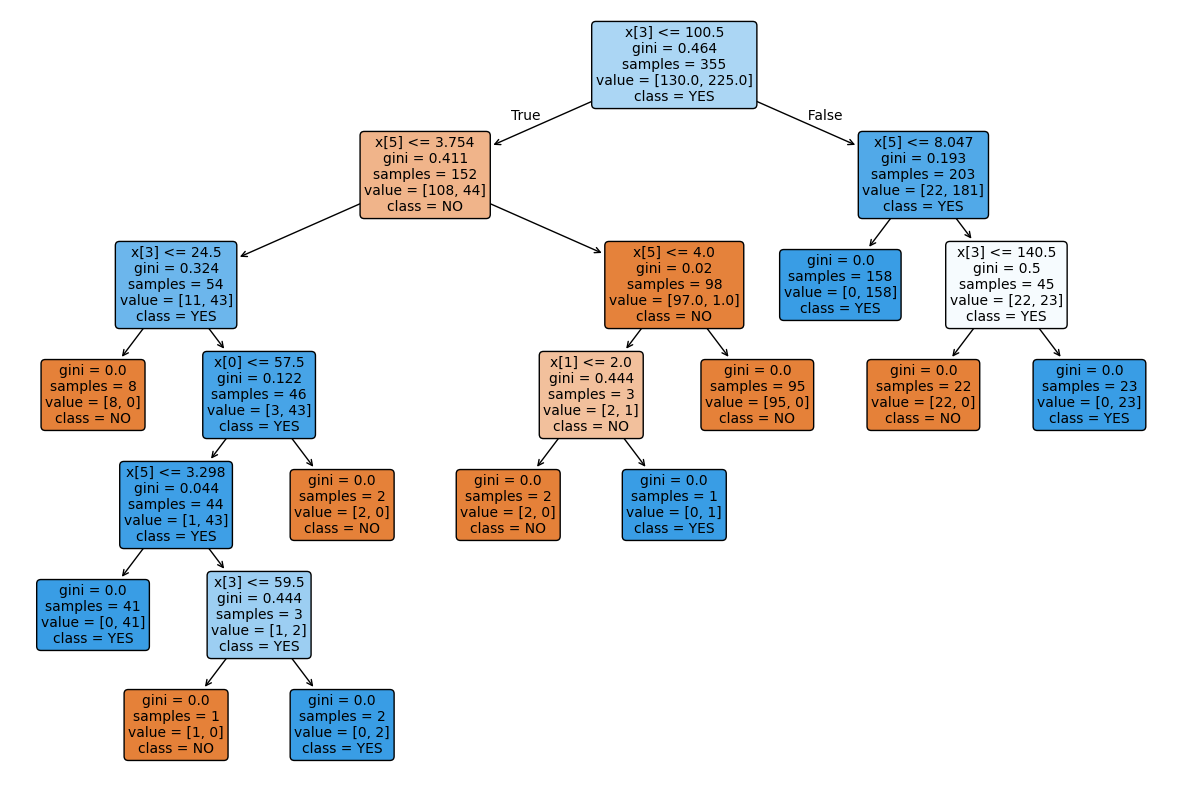

In [37]:
# Visualization
plt.figure(figsize=(15, 10))
tree.plot_tree(gini_model, 
               filled=True,
               rounded=True,
               class_names=gini_model.classes_,
               feature_names=None)

plt.show()

In [38]:
# Model evaluation
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Gini impurity model
Accuracy: 0.9831932773109243
Balanced accuracy: 0.9813946216385241
Precision score 0.9871794871794872
Recall score 0.975609756097561


In [39]:
# Entropy model - max depth 3
entr_model2 = tree.DecisionTreeClassifier(criterion='entropy', random_state=1234, max_depth=3)
entr_model2.fit(X_train, y_train)
y_pred = entr_model2.predict(X_test)
y_pred = pd.Series(y_pred)
entr_model2

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1234)

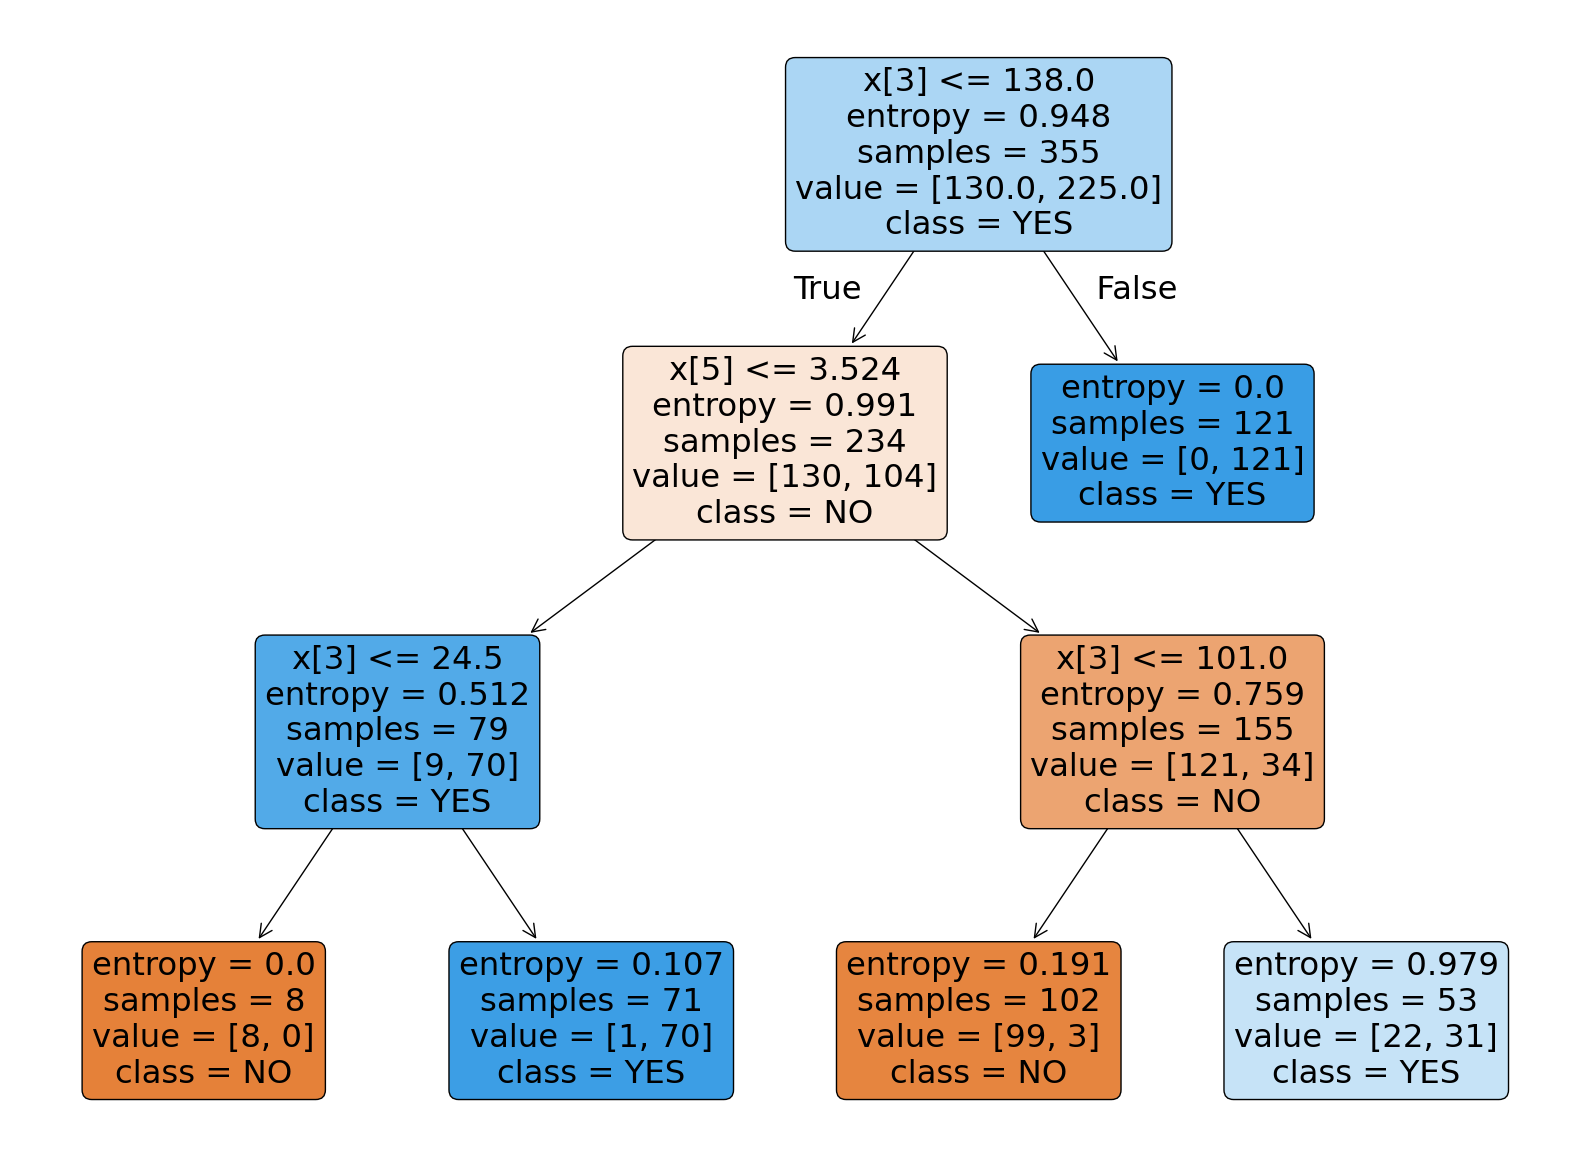

In [43]:
# Visualization
plt.figure(figsize=(20, 15))
tree.plot_tree(entr_model2, 
               filled=True, 
               rounded=True, 
               class_names=entr_model2.classes_,
               feature_names=None)

plt.show()

In [44]:
# Model evaluation 
print("Model Entropy model max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Entropy model max depth 3
Accuracy: 0.907563025210084
Balanced accuracy: 0.8658536585365854
Precision score for "Yes" 0.8764044943820225
Recall score for "No" 0.7317073170731707


In [45]:
# Gini impurity  model - max depth 3
gini_model2 = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 1234, max_depth = 3)
gini_model2.fit(X_train, y_train)
y_pred = gini_model2.predict(X_test)
y_pred = pd.Series(y_pred)
gini_model2

DecisionTreeClassifier(max_depth=3, random_state=1234)

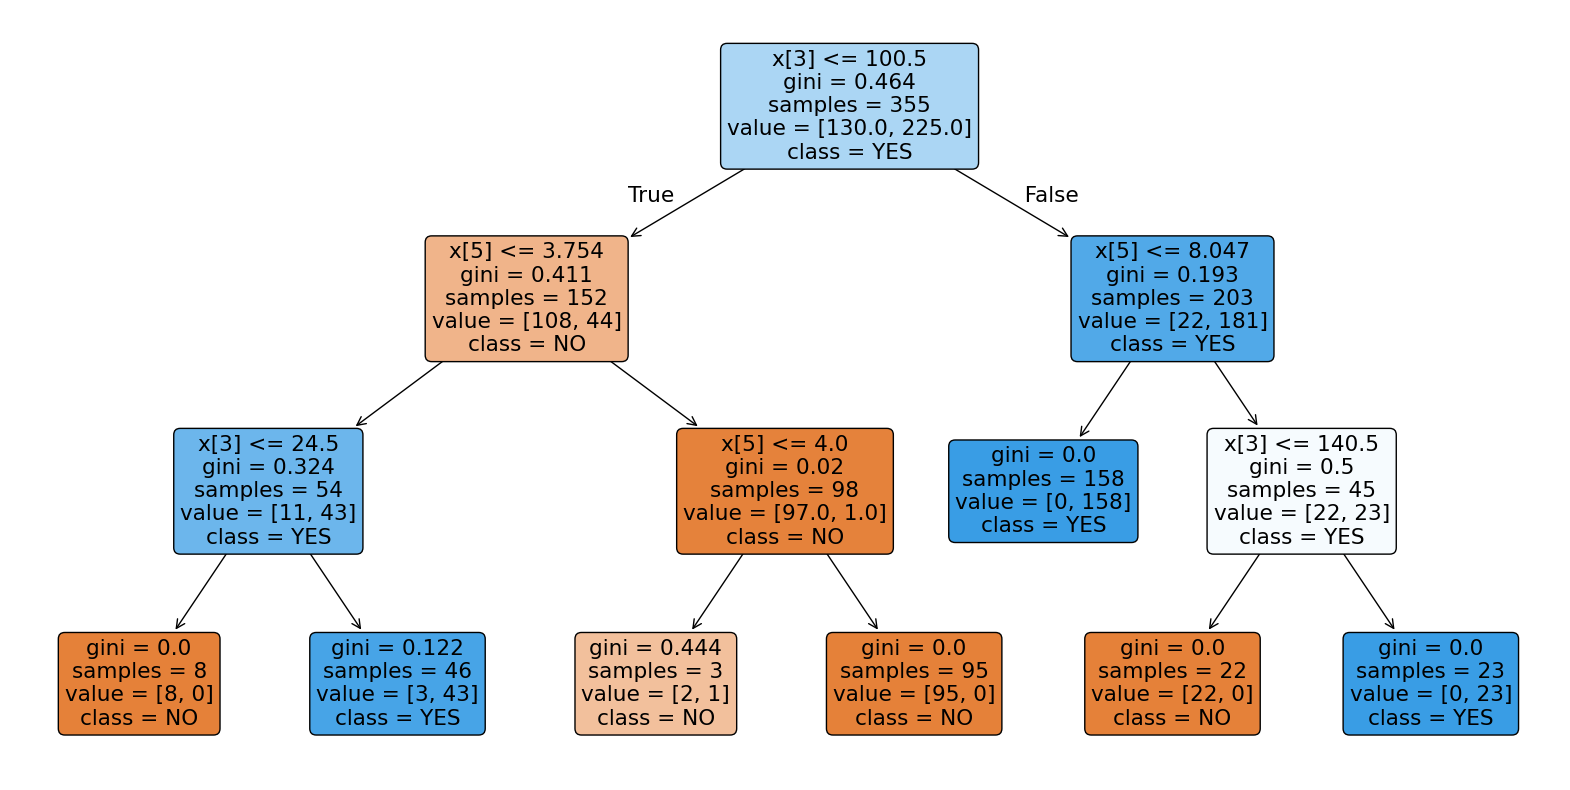

In [46]:
plt.figure(figsize=(20, 10))
tree.plot_tree(gini_model2, 
               filled=True, 
               rounded=True, 
               class_names=gini_model2.classes_, # Uses the specific classes from gini_model2
               feature_names=None) 

plt.show()

In [47]:
print("Gini impurity  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Gini impurity  model - max depth 3
Accuracy: 0.9747899159663865
Balanced accuracy: 0.9691994996873046
Precision score 0.9746835443037974
Recall score 0.9512195121951219


# Evaluating and concluding


In [48]:
df['Decision'].value_counts()

Decision
YES    303
NO     171
Name: count, dtype: int64

In [50]:
feature_cols = [column for column in df.columns if column != 'Decision']

new_X = df_na[feature_cols]
new_X = pd.get_dummies(new_X)

In [51]:
# Target Variable
potential_buyers = gini_model2.predict(new_X)

In [52]:
np.unique(potential_buyers, return_counts=True)

(array(['NO', 'YES'], dtype=object), array([ 45, 183], dtype=int64))

The total number of potential buyers is 303 + 183 = 486

In [53]:
# Surveyed people 
len(df)

702

In [ ]:
# Proportion of buyers
486/702

0.6923076923076923

In [54]:
# Percentage of people who want to buy the Hidden Farm coffee
buyers = len(potential_buyers[potential_buyers=='YES'])
total = len(potential_buyers)
buyers/total 

0.8026315789473685

# Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [56]:
# Model and fit
RFModel = RandomForestClassifier(max_depth = 3, random_state = 1234)
RFModel.fit(X_train, y_train)
y_pred = RFModel.predict(X_test)
print('Random Forest model - max depth 3')
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))


Random Forest model - max depth 3
Accuracy: 0.9411764705882353
Balanced accuracy: 0.9204190118824265
Precision score 0.927710843373494
Recall score 0.8536585365853658


In [57]:
RF_potential_buyers = RFModel.predict(new_X)
buyers = len(RF_potential_buyers[RF_potential_buyers=='YES'])
total = len(RF_potential_buyers)
buyers/total

0.8289473684210527

# Revise conclusion

The percentage of potential buyers has increased from 80.26% to 82.89% in a Random Forest model. Therefore, RR should purchase Hidden Farm coffee.